In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
Bi=pd.read_csv(r"C:\Users\VICTUS\Downloads\archive\nvidia_stock_data.csv")

In [3]:
# View first 5 rows
print(Bi.head())

# Check column names
print(Bi.columns)

# Optional: Check missing values
print(Bi.isnull().sum())


         Date    Open    High     Low   Close  Adj Close     Volume
0  2023-01-03  14.851  14.996  14.096  14.315  14.305580  401277000
1  2023-01-04  14.567  14.853  14.241  14.749  14.739294  431324000
2  2023-01-05  14.491  14.564  14.148  14.265  14.255614  389168000
3  2023-01-06  14.474  15.010  14.034  14.859  14.849222  405044000
4  2023-01-09  15.284  16.056  15.141  15.628  15.617717  504231000
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [5]:
# Profit Margin %
if 'Profit' in Bi.columns and 'Sales' in Bi.columns:
    Bi['Profit_Margin'] = Bi['Profit'] / Bi['Sales'].replace(0, pd.NA) * 100
else:
    print("Error: 'Profit' or 'Sales' column not found in the DataFrame.")

Error: 'Profit' or 'Sales' column not found in the DataFrame.


In [6]:
import pandas as pd

Bi = pd.read_csv(r"C:\Users\VICTUS\Downloads\archive\nvidia_stock_data.csv")
print(Bi.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [7]:
import pandas as pd
import numpy as np

Bi = pd.read_csv(r"C:\Users\VICTUS\Downloads\archive\nvidia_stock_data.csv")

# Treat 'Close' price as Sales
Bi['Sales'] = Bi['Close']

# Create dummy Profit as 15% of Sales
Bi['Profit'] = Bi['Sales'] * 0.15

# Add Profit Margin
Bi['Profit_Margin'] = Bi['Profit'] / Bi['Sales'] * 100

# Add dummy Product (for charts)
import random
products = ['RTX 4090', 'RTX 4080', 'RTX 4070']
Bi['Product'] = [random.choice(products) for _ in range(len(Bi))]

# Add dummy Region (for charts)
regions = ['USA', 'Europe', 'Asia']
Bi['Region'] = [random.choice(regions) for _ in range(len(Bi))]

# Convert Date column to datetime
Bi['Date'] = pd.to_datetime(Bi['Date'])
Bi['Month'] = Bi['Date'].dt.strftime('%b-%Y')


In [8]:
# Sales by Product
sales_by_product = Bi.groupby('Product')['Sales'].sum().reset_index()

# Sales by Region
sales_by_region = Bi.groupby('Region')['Sales'].sum().reset_index()

# Monthly Sales Trend
monthly_sales = Bi.groupby(['Month','Product'])['Sales'].sum().reset_index()

# KPIs
total_sales = Bi['Sales'].sum()
total_profit = Bi['Profit'].sum()
avg_margin = Bi['Profit_Margin'].mean()


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_6616\2818543568.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='Sales', data=sales_by_product, palette='Blues_d')


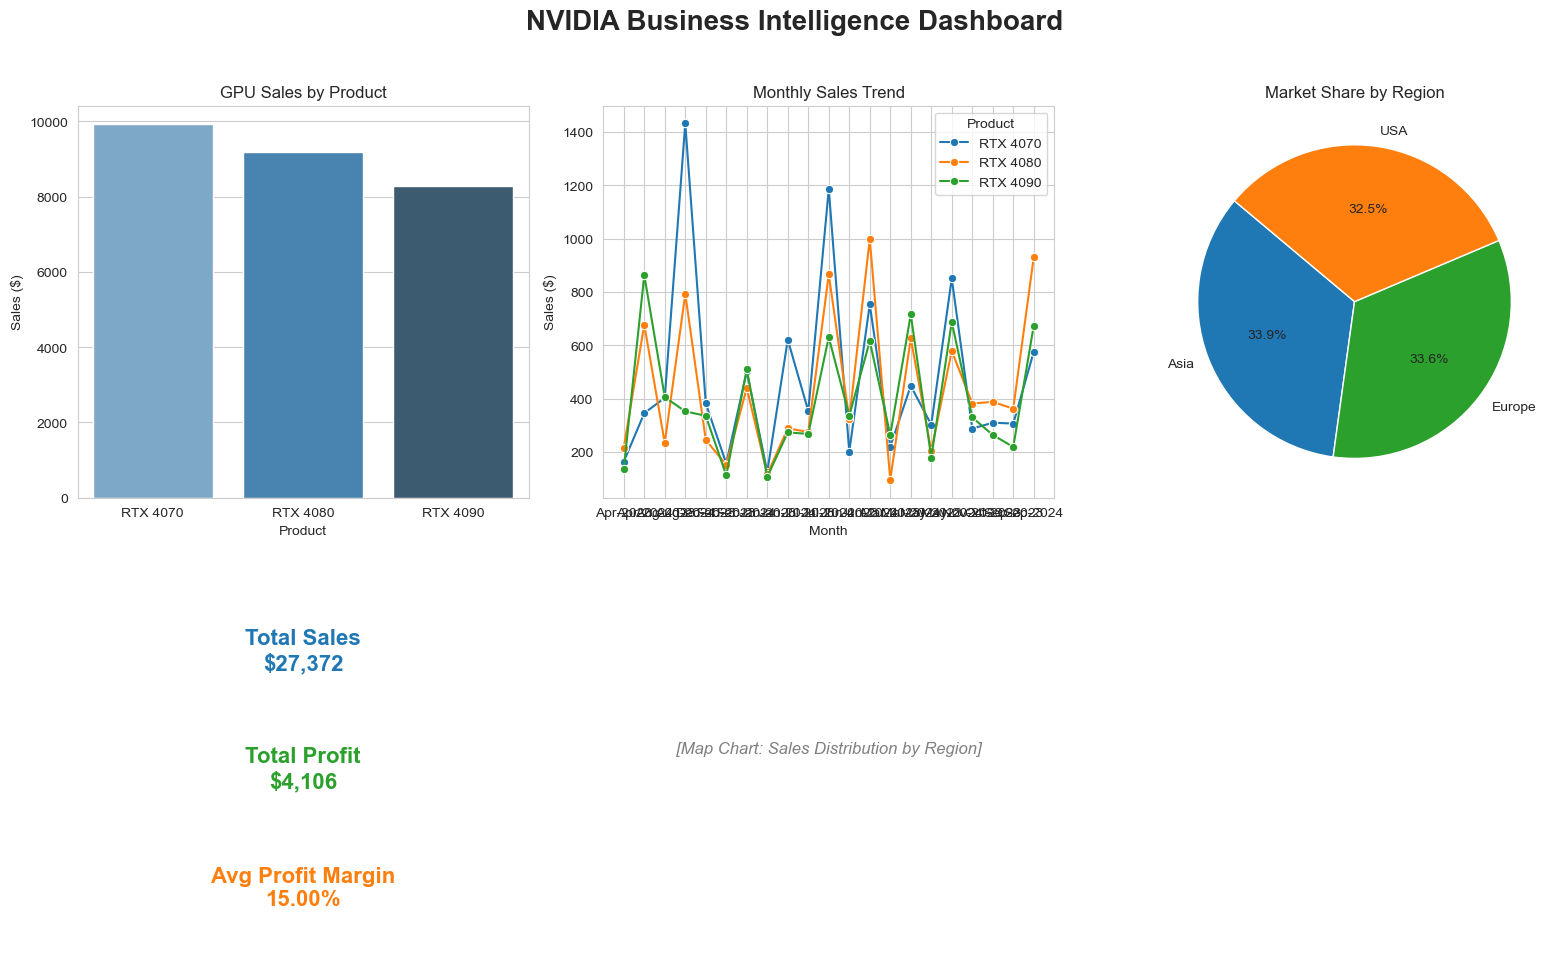

In [9]:
# NVIDIA Dashboard from Stock CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# -------------------------------
# Load CSV
# -------------------------------
Bi = pd.read_csv(r"C:\Users\VICTUS\Downloads\archive\nvidia_stock_data.csv")

# -------------------------------
# Prepare Data for Dashboard
# -------------------------------
Bi['Sales'] = Bi['Close']                       # Treat Close as Sales
Bi['Profit'] = Bi['Sales'] * 0.15               # Dummy Profit = 15% of Sales
Bi['Profit_Margin'] = Bi['Profit'] / Bi['Sales'] * 100

# Dummy Product and Region
products = ['RTX 4090', 'RTX 4080', 'RTX 4070']
regions = ['USA', 'Europe', 'Asia']
Bi['Product'] = [random.choice(products) for _ in range(len(Bi))]
Bi['Region'] = [random.choice(regions) for _ in range(len(Bi))]

# Month column for line chart
Bi['Date'] = pd.to_datetime(Bi['Date'])
Bi['Month'] = Bi['Date'].dt.strftime('%b-%Y')

# Aggregate data
sales_by_product = Bi.groupby('Product')['Sales'].sum().reset_index()
sales_by_region = Bi.groupby('Region')['Sales'].sum().reset_index()
monthly_sales = Bi.groupby(['Month','Product'])['Sales'].sum().reset_index()

# KPIs
total_sales = Bi['Sales'].sum()
total_profit = Bi['Profit'].sum()
avg_margin = Bi['Profit_Margin'].mean()

# -------------------------------
# Create Dashboard
# -------------------------------
sns.set_style("whitegrid")
plt.figure(figsize=(16,10), facecolor='white')
plt.suptitle("NVIDIA Business Intelligence Dashboard", fontsize=20, fontweight='bold', y=0.95)

# Bar Chart: GPU Sales by Product
plt.subplot(2,3,1)
sns.barplot(x='Product', y='Sales', data=sales_by_product, palette='Blues_d')
plt.title("GPU Sales by Product")
plt.ylabel("Sales ($)")

# Line Chart: Monthly Sales Trend
plt.subplot(2,3,2)
sns.lineplot(x='Month', y='Sales', hue='Product', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales ($)")

# Pie Chart: Market Share by Region
plt.subplot(2,3,3)
plt.pie(sales_by_region['Sales'], labels=sales_by_region['Region'], autopct='%1.1f%%', startangle=140, colors=['#1f77b4','#2ca02c','#ff7f0e'])
plt.title("Market Share by Region")

# KPI Cards
plt.subplot(2,3,4)
plt.axis('off')
plt.text(0.5,0.7,f"Total Sales\n${total_sales:,.0f}", fontsize=16, ha='center', fontweight='bold', color='#1f77b4')
plt.text(0.5,0.4,f"Total Profit\n${total_profit:,.0f}", fontsize=16, ha='center', fontweight='bold', color='#2ca02c')
plt.text(0.5,0.1,f"Avg Profit Margin\n{avg_margin:.2f}%", fontsize=16, ha='center', fontweight='bold', color='#ff7f0e')

# Map Placeholder
plt.subplot(2,3,5)
plt.axis('off')
plt.text(0.5,0.5,"[Map Chart: Sales Distribution by Region]", fontsize=12, ha='center', va='center', style='italic', color='gray')

# Save dashboard image
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig("NVIDIA_Dashboard.png", dpi=300)
plt.show()


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_6616\3011947200.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='Sales', data=sales_by_product, palette='Blues_d')


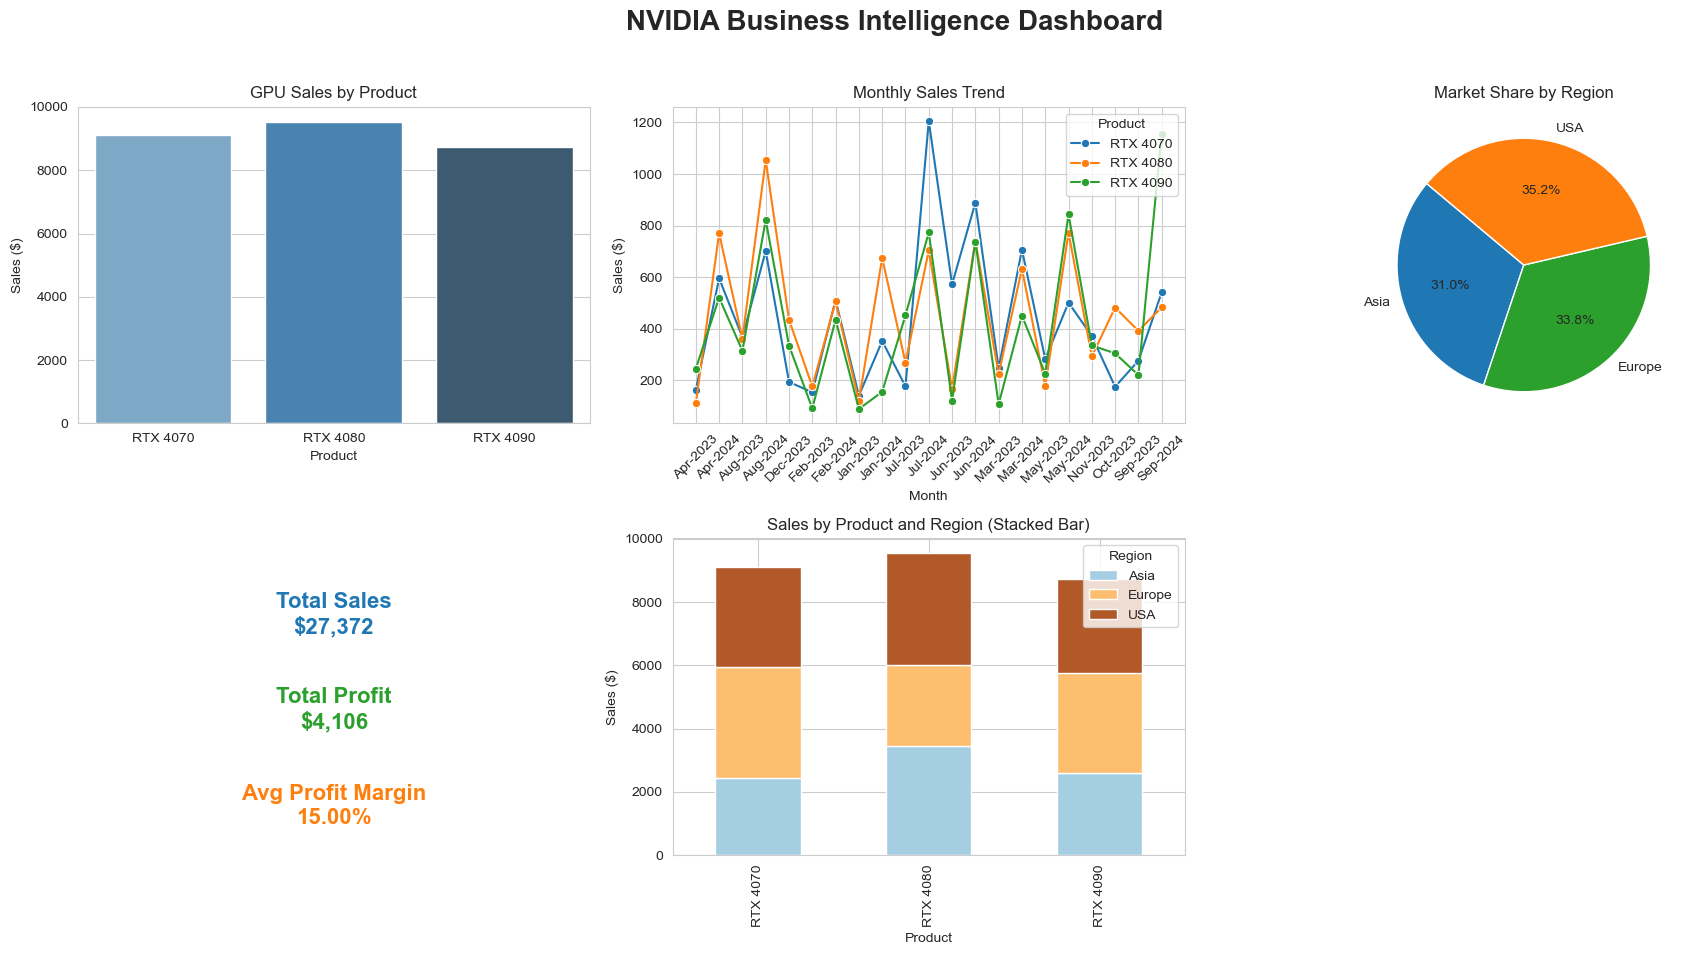

In [10]:
# NVIDIA Dashboard from Stock CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# -------------------------------
# Load CSV
# -------------------------------
Bi = pd.read_csv(r"C:\Users\VICTUS\Downloads\archive\nvidia_stock_data.csv")

# -------------------------------
# Prepare Data for Dashboard
# -------------------------------
Bi['Sales'] = Bi['Close']                       # Treat Close as Sales
Bi['Profit'] = Bi['Sales'] * 0.15               # Dummy Profit = 15% of Sales
Bi['Profit_Margin'] = Bi['Profit'] / Bi['Sales'] * 100

# Dummy Product and Region
products = ['RTX 4090', 'RTX 4080', 'RTX 4070']
regions = ['USA', 'Europe', 'Asia']
Bi['Product'] = [random.choice(products) for _ in range(len(Bi))]
Bi['Region'] = [random.choice(regions) for _ in range(len(Bi))]

# Month column for line chart
Bi['Date'] = pd.to_datetime(Bi['Date'])
Bi['Month'] = Bi['Date'].dt.strftime('%b-%Y')

# Aggregate data
sales_by_product = Bi.groupby('Product')['Sales'].sum().reset_index()
sales_by_region = Bi.groupby('Region')['Sales'].sum().reset_index()
monthly_sales = Bi.groupby(['Month','Product'])['Sales'].sum().reset_index()
sales_region_product = Bi.groupby(['Product','Region'])['Sales'].sum().unstack()

# KPIs
total_sales = Bi['Sales'].sum()
total_profit = Bi['Profit'].sum()
avg_margin = Bi['Profit_Margin'].mean()

# -------------------------------
# Create Dashboard
# -------------------------------
sns.set_style("whitegrid")
plt.figure(figsize=(18,10), facecolor='white')
plt.suptitle("NVIDIA Business Intelligence Dashboard", fontsize=20, fontweight='bold', y=0.95)

# 1️⃣ Bar Chart: GPU Sales by Product
plt.subplot(2,3,1)
sns.barplot(x='Product', y='Sales', data=sales_by_product, palette='Blues_d')
plt.title("GPU Sales by Product")
plt.ylabel("Sales ($)")

# 2️⃣ Line Chart: Monthly Sales Trend
plt.subplot(2,3,2)
sns.lineplot(x='Month', y='Sales', hue='Product', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales ($)")
plt.xticks(rotation=45)

# 3️⃣ Pie Chart: Market Share by Region
plt.subplot(2,3,3)
plt.pie(sales_by_region['Sales'], labels=sales_by_region['Region'], autopct='%1.1f%%', startangle=140, colors=['#1f77b4','#2ca02c','#ff7f0e'])
plt.title("Market Share by Region")

# 4️⃣ KPI Cards
plt.subplot(2,3,4)
plt.axis('off')
plt.text(0.5,0.7,f"Total Sales\n${total_sales:,.0f}", fontsize=16, ha='center', fontweight='bold', color='#1f77b4')
plt.text(0.5,0.4,f"Total Profit\n${total_profit:,.0f}", fontsize=16, ha='center', fontweight='bold', color='#2ca02c')
plt.text(0.5,0.1,f"Avg Profit Margin\n{avg_margin:.2f}%", fontsize=16, ha='center', fontweight='bold', color='#ff7f0e')

# 5️⃣ Stacked Bar Chart: Sales by Product and Region
plt.subplot(2,3,5)
sales_region_product.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Paired')
plt.title("Sales by Product and Region (Stacked Bar)")
plt.ylabel("Sales ($)")
plt.xlabel("Product")
plt.legend(title='Region')

# Save dashboard image
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig("NVIDIA_Dashboard.png", dpi=300)
plt.show()


In [11]:
plt.savefig(r"C:\Users\VICTUS\OneDrive\Desktop\NVIDIA_Dashboard.png", dpi=300)


<Figure size 640x480 with 0 Axes>

In [13]:
plt.tight_layout(rect=[0, 0, 1, 0.93])  # adjust layout
plt.savefig(r"C:\Users\VICTUS\OneDrive\Desktop\NVIDIA_Dashboard.png", dpi=300)
plt.show()


<Figure size 640x480 with 0 Axes>

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_6616\2601246446.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='Sales', data=sales_by_product, palette='Blues_d', ax=axs[0,0])


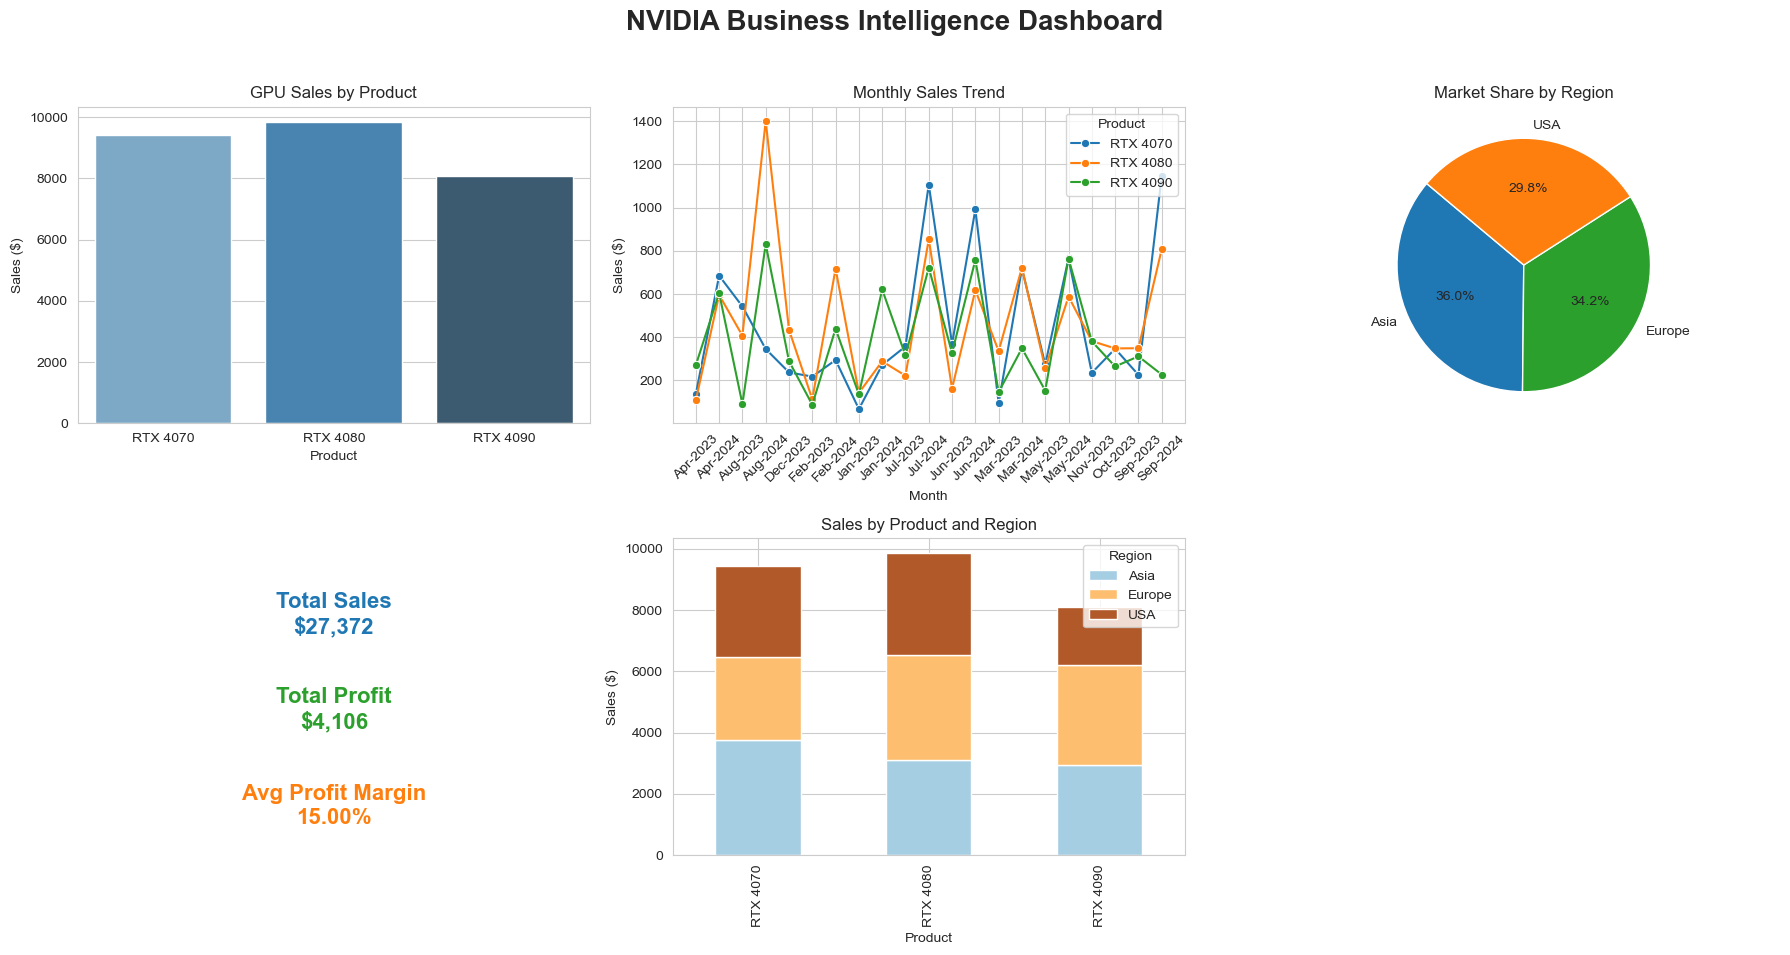

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

plt.close('all')  # Close any previous figures

# -------------------------------
# Load CSV
# -------------------------------
Bi = pd.read_csv(r"C:\Users\VICTUS\Downloads\archive\nvidia_stock_data.csv")

# -------------------------------
# Prepare Data
# -------------------------------
Bi['Sales'] = Bi['Close']
Bi['Profit'] = Bi['Sales'] * 0.15
Bi['Profit_Margin'] = Bi['Profit'] / Bi['Sales'] * 100

products = ['RTX 4090', 'RTX 4080', 'RTX 4070']
regions = ['USA', 'Europe', 'Asia']
Bi['Product'] = [random.choice(products) for _ in range(len(Bi))]
Bi['Region'] = [random.choice(regions) for _ in range(len(Bi))]

Bi['Date'] = pd.to_datetime(Bi['Date'])
Bi['Month'] = Bi['Date'].dt.strftime('%b-%Y')

# Aggregations
sales_by_product = Bi.groupby('Product')['Sales'].sum().reset_index()
sales_by_region = Bi.groupby('Region')['Sales'].sum().reset_index()
monthly_sales = Bi.groupby(['Month','Product'])['Sales'].sum().reset_index()
sales_region_product = Bi.groupby(['Product','Region'])['Sales'].sum().unstack()

# KPIs
total_sales = Bi['Sales'].sum()
total_profit = Bi['Profit'].sum()
avg_margin = Bi['Profit_Margin'].mean()

# -------------------------------
# Create Figure
# -------------------------------
sns.set_style("whitegrid")
fig, axs = plt.subplots(2, 3, figsize=(18,10))
fig.suptitle("NVIDIA Business Intelligence Dashboard", fontsize=20, fontweight='bold', y=0.95)

# 1️⃣ Bar Chart: GPU Sales by Product
sns.barplot(x='Product', y='Sales', data=sales_by_product, palette='Blues_d', ax=axs[0,0])
axs[0,0].set_title("GPU Sales by Product")
axs[0,0].set_ylabel("Sales ($)")

# 2️⃣ Line Chart: Monthly Sales Trend
sns.lineplot(x='Month', y='Sales', hue='Product', data=monthly_sales, marker='o', ax=axs[0,1])
axs[0,1].set_title("Monthly Sales Trend")
axs[0,1].set_ylabel("Sales ($)")
axs[0,1].tick_params(axis='x', rotation=45)

# 3️⃣ Pie Chart: Market Share by Region
axs[0,2].pie(sales_by_region['Sales'], labels=sales_by_region['Region'], autopct='%1.1f%%', startangle=140, colors=['#1f77b4','#2ca02c','#ff7f0e'])
axs[0,2].set_title("Market Share by Region")

# 4️⃣ KPI Cards
axs[1,0].axis('off')
axs[1,0].text(0.5,0.7,f"Total Sales\n${total_sales:,.0f}", fontsize=16, ha='center', fontweight='bold', color='#1f77b4')
axs[1,0].text(0.5,0.4,f"Total Profit\n${total_profit:,.0f}", fontsize=16, ha='center', fontweight='bold', color='#2ca02c')
axs[1,0].text(0.5,0.1,f"Avg Profit Margin\n{avg_margin:.2f}%", fontsize=16, ha='center', fontweight='bold', color='#ff7f0e')

# 5️⃣ Stacked Bar Chart: Sales by Product and Region
sales_region_product.plot(kind='bar', stacked=True, ax=axs[1,1], colormap='Paired')
axs[1,1].set_title("Sales by Product and Region")
axs[1,1].set_ylabel("Sales ($)")
axs[1,1].set_xlabel("Product")
axs[1,1].legend(title='Region')

# 6️⃣ Optional placeholder or leave empty
axs[1,2].axis('off')

# -------------------------------
# Save to Desktop
# -------------------------------
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig(r"C:\Users\VICTUS\OneDrive\Desktop\NVIDIA_Dashboard.png", dpi=300)
plt.show()
